In [1]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.visualization import astropy_mpl_style, quantity_support

plt.style.use(astropy_mpl_style)
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7fa308dc6950>

In [2]:
import astropy.units as u
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
from astropy.time import Time

In [3]:
m33 = SkyCoord.from_name('M33')

In [22]:
bear_mountain = EarthLocation(lat=41.3*u.deg, lon=-74*u.deg, height=390*u.m)
time = Time('2012-7-12 23:00:00', scale='utc')



In [5]:
m33altaz = m33.transform_to(AltAz(obstime=time,location=bear_mountain))
print(f"M33's Altitude = {m33altaz.alt:.2}")

M33's Altitude = 0.13 deg


In [7]:
midnight = Time('2012-7-13 00:00:00') - utcoffset
delta_midnight = np.linspace(-2, 10, 100)*u.hour
frame_July13night = AltAz(obstime=midnight+delta_midnight,
                          location=bear_mountain)
m33altazs_July13night = m33.transform_to(frame_July13night)

In [30]:
from astropy.coordinates import get_sun

delta_midnight = np.linspace(-4, 24, 1000)*u.hour
times_July12_to_13 = midnight + delta_midnight
frame_July12_to_13 = AltAz(obstime=times_July12_to_13, location=bear_mountain)
sunaltazs_July12_to_13 = get_sun(times_July12_to_13).transform_to(frame_July12_to_13)

In [31]:
from astropy.coordinates import get_moon

moon_July12_to_13 = get_moon(times_July12_to_13)
moonaltazs_July12_to_13 = moon_July12_to_13.transform_to(frame_July12_to_13)

In [32]:
m33altazs_July12_to_13 = m33.transform_to(frame_July12_to_13)


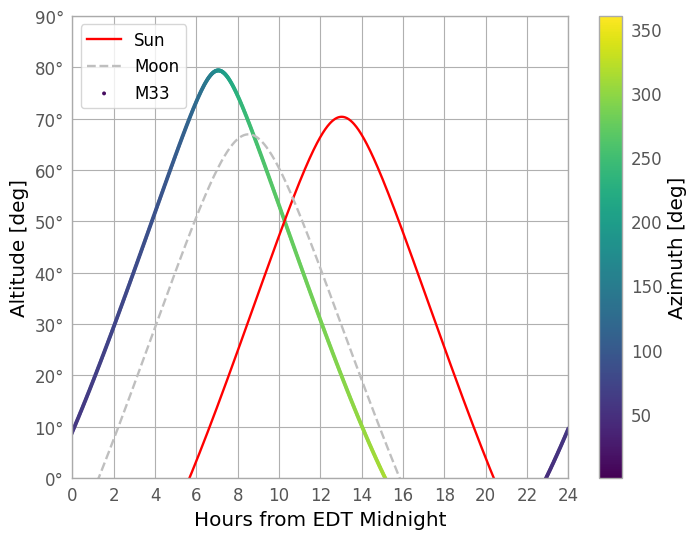

In [33]:
plt.plot(delta_midnight, sunaltazs_July12_to_13.alt, color='r', label='Sun')
plt.plot(delta_midnight, moonaltazs_July12_to_13.alt, color=[0.75]*3, ls='--', label='Moon')
plt.scatter(delta_midnight, m33altazs_July12_to_13.alt,
            c=m33altazs_July12_to_13.az, label='M33', lw=0, s=8,
            cmap='viridis')

plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper left')
plt.xlim(0, 24*u.hour)
plt.xticks((np.arange(13)*2)*u.hour)
plt.ylim(0*u.deg, 90*u.deg)
plt.xlabel('Hours from EDT Midnight')
plt.ylabel('Altitude [deg]')
plt.show()